In [1]:
import matplotlib.pyplot as plt
import numpy as np

1e-06


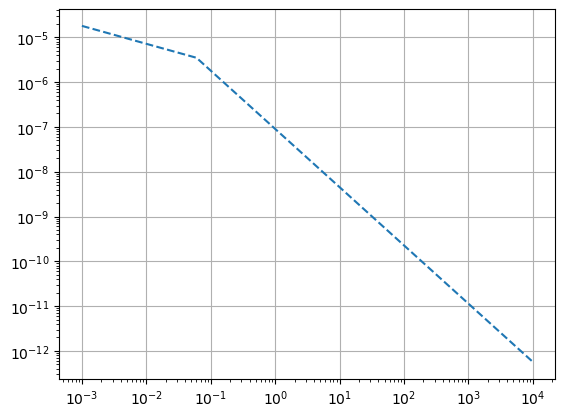

In [2]:
fc = 0.06
freqs = np.logspace(-3,4,2000)

PSD = lambda f: (f/fc)**(-0.4) * (f<fc) + (f/fc)**(-1.3) * (f>=fc)
psd = PSD(freqs)

amp = 1e-6
psd *= amp/np.trapezoid(psd,freqs)

plt.figure()
plt.plot(freqs, psd,'--')
plt.xscale('log')
plt.yscale('log')
plt.grid()

print(np.trapezoid(psd,freqs))

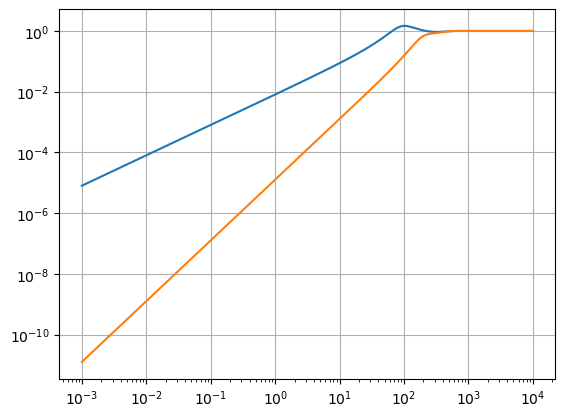

In [3]:
om = lambda f: 2*np.pi*f

f1 = 2000
T = 1/f1

OLTF = lambda G,T,Td,f: G*T/om(f) * (np.sinc(om(f)*T/2))**2 * np.exp(-1j*om(f)*Td-1j*np.pi)
DOLTF = lambda G,T,Td,f: G*T/om(f)**2 * (np.sinc(om(f)*T/2))**2 * np.exp(-1j*om(f)*Td-1j*np.pi)
dGopt = 2*np.pi/(4*(1/f1)**3*2)
Gopt = np.pi/(4*T*T*2)

rtf = 1/(1+OLTF(Gopt,T,2*T,freqs))
drtf = 1/(1+DOLTF(dGopt,T,2*T,freqs))

plt.figure()
plt.plot(freqs,np.abs(rtf))
plt.plot(freqs,np.abs(drtf))
plt.xscale('log')
plt.yscale('log')
plt.grid()

9.823816489352678e-08 4.718422304060748e-08


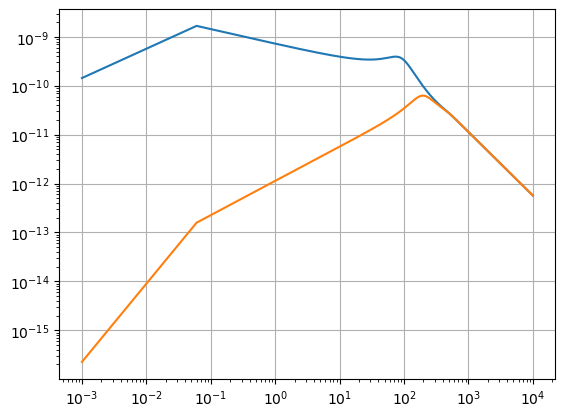

In [4]:
plt.figure()
plt.plot(freqs, np.abs(psd*rtf))
plt.plot(freqs, np.abs(psd*drtf))
plt.xscale('log')
plt.yscale('log')
plt.grid()

print(np.trapezoid(psd*np.abs(rtf),freqs), np.trapezoid(psd*np.abs(drtf),freqs))